You just got some contract work with an Ecommerce company based in New
York City that sells clothing online but they also have in-store style and clothing advice sessions.
Customers come in to the store, have sessions/meetings with a personal stylist, then they can go
home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or
their website. They’ve hired you on contract to help them figure it out! Let’s get started!
Just follow the steps below to analyze the customer data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Get the Data
We’ll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas
Email, Address, and their color Avatar. Then it also has numerical value columns:

• Avg. Session Length: Average session of in-store style advice sessions.

• Time on App: Average time spent on App in minutes

• Time on Website: Average time spent on Website in minutes

• Length of Membership: How many years the customer has been a member.

In [ ]:
customers=pd.read_csv('Ecommerce Customers')

In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

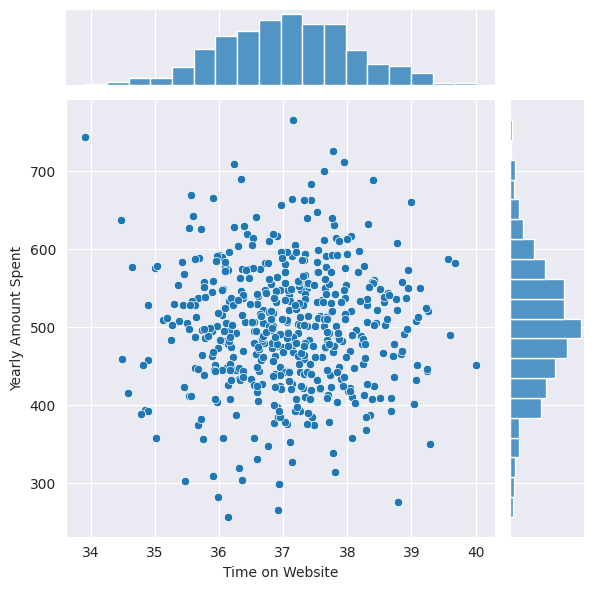

In [ ]:
sns.set_style('darkgrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

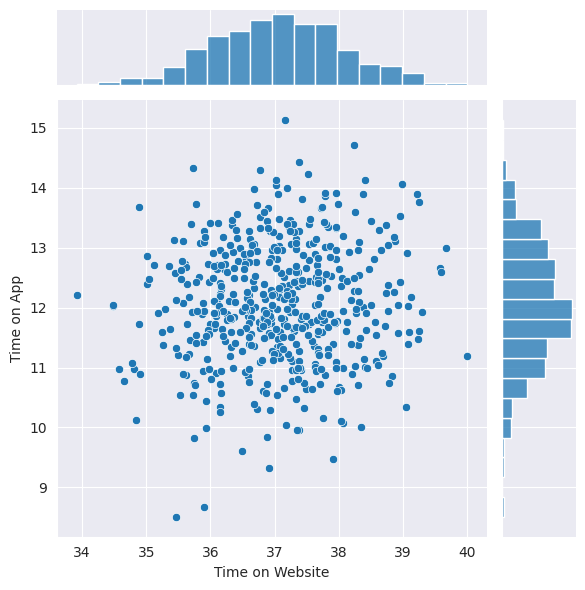

In [ ]:
sns.jointplot(data=customers,x='Time on Website',y='Time on App')

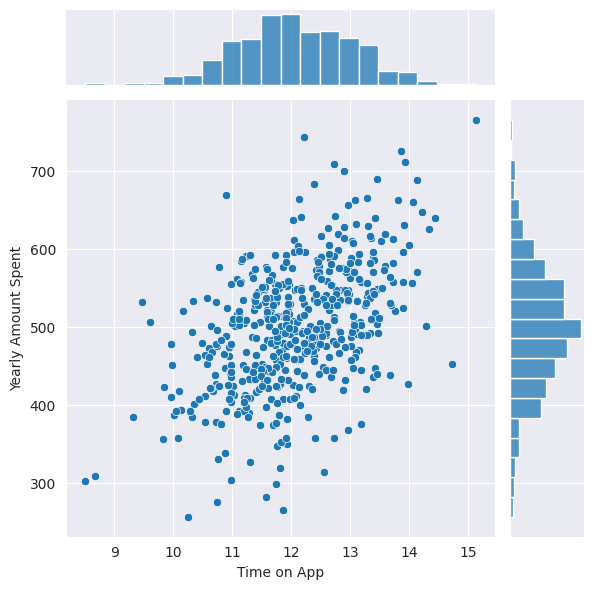

In [ ]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent')

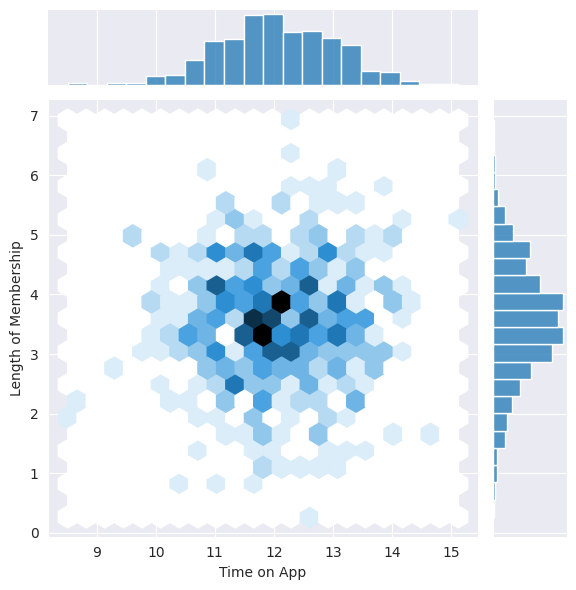

In [ ]:
sns.jointplot(data=customers,x='Time on App',y='Length of Membership',kind='hex')

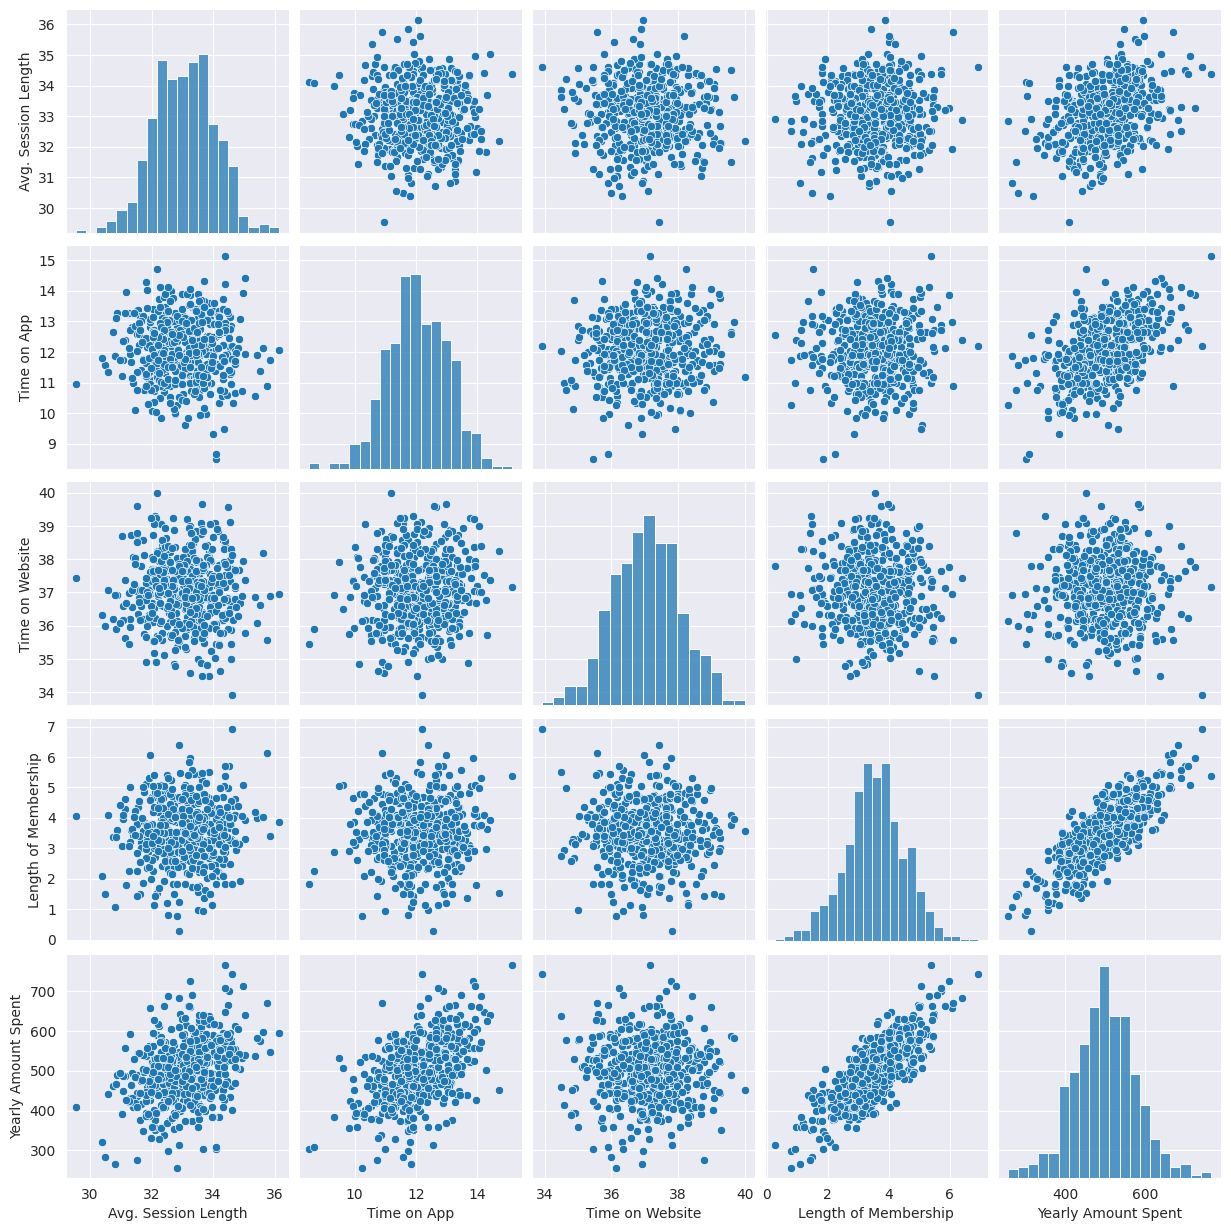

In [ ]:
sns.pairplot(customers)

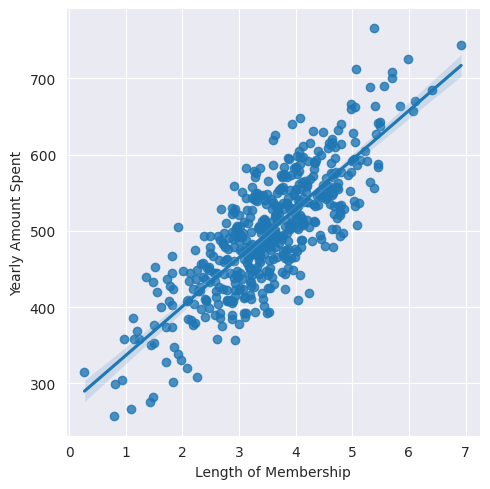

In [ ]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and  Testing Data

In [ ]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [ ]:
y=customers['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

##Training Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

##predicting the test data

In [ ]:
predictions=lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0, 0.5, 'Predicted values')

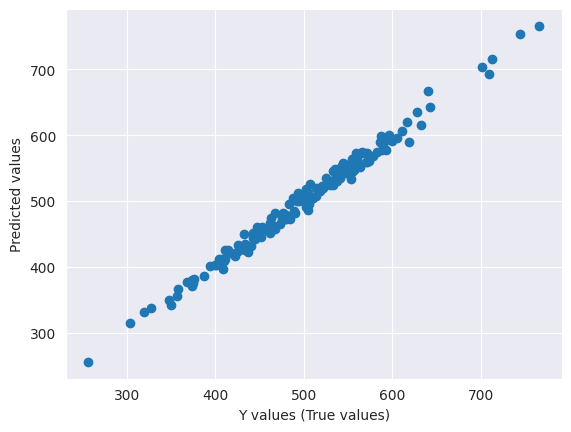

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y values (True values)')
plt.ylabel('Predicted values')

##Evaluating Metrics

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE :',metrics.mean_absolute_error(y_test,predictions))
print('MSE :',metrics.mean_squared_error(y_test,predictions))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 7.228148653430826
MSE : 79.81305165097427
RMSE : 8.933815066978624


In [ ]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

##Residuals

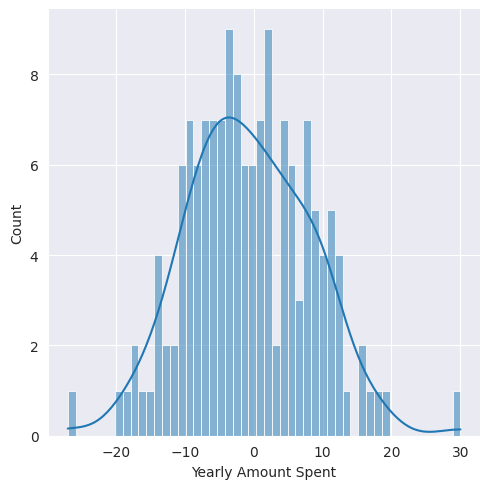

In [ ]:
sns.displot((y_test-predictions),bins=50,kde=True)

##Conclusion

In [ ]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Do you think the company should focus on their mobile app or website?

Answer : On Mobile App